In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('housing_data.csv')
df

,Unnamed: 0,price,location,Garden,Resale,Area,Parking,Furnished
0,0,₹1 Cr,"1 BHK Flat for Sale in Mumbai Central, Mumbai",yes,yes,Area500,0,1
1,1,₹1.20 Cr,"1 BHK Flat for Sale in Antop Hill, Mumbai",yes,yes,Area464,1,1
2,2,₹32 Lac,"Studio Apartment for Sale in Mira Road, Mumbai",no,yes,Area330,1,1
3,3,₹1.30 Cr,"2 BHK Flat for Sale in Vinay Nagar, Mumbai",no,no,Area600,0,1
4,4,₹2.50 Cr,"3 BHK Flat for Sale in Nahar Nagar, Mumbai",yes,yes,Area975,1,1
...,...,...,...,...,...,...,...,...
1495,1495,₹3.75 Cr,"2 BHK Flat for Sale in Parel, Mumbai",yes,yes,Area1000,1,1
1496,1496,₹2.05 Cr,"2 BHK Flat for Sale in Chandavarkar Road, Mumbai",no,yes,Area555,0,1
1497,1497,₹50 Lac,1 BHK Flat for Sale in MHB Colony Borivali Wes...,no,yes,Area279,0,1
1498,1498,₹1.60 Cr,"2 BHK Flat for Sale in Goregaon East, Mumbai",yes,yes,Area850,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1500 non-null   int64 
 1   price       1500 non-null   object
 2   location    1500 non-null   object
 3   Garden      1500 non-null   object
 4   Resale      1500 non-null   object
 5   Area        1496 non-null   object
 6   Parking     1500 non-null   int64 
 7   Furnished   1500 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 93.9+ KB


In [4]:
df.isna().sum()

Unnamed: 0    0
price         0
location      0
Garden        0
Resale        0
Area          4
Parking       0
Furnished     0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df['Location']=df['location'].str.split(' in ').str.get(1).str.split(',').str.get(0)
df['BHK']=df['location'].str.split('BHK').str.get(0).str.split(',').str.get(0)


In [7]:
df

,Unnamed: 0,price,location,Garden,Resale,Area,Parking,Furnished,Location,BHK
0,0,₹1 Cr,"1 BHK Flat for Sale in Mumbai Central, Mumbai",yes,yes,Area500,0,1,Mumbai Central,1
1,1,₹1.20 Cr,"1 BHK Flat for Sale in Antop Hill, Mumbai",yes,yes,Area464,1,1,Antop Hill,1
2,2,₹32 Lac,"Studio Apartment for Sale in Mira Road, Mumbai",no,yes,Area330,1,1,Mira Road,Studio Apartment for Sale in Mira Road
3,3,₹1.30 Cr,"2 BHK Flat for Sale in Vinay Nagar, Mumbai",no,no,Area600,0,1,Vinay Nagar,2
4,4,₹2.50 Cr,"3 BHK Flat for Sale in Nahar Nagar, Mumbai",yes,yes,Area975,1,1,Nahar Nagar,3
...,...,...,...,...,...,...,...,...,...,...
1495,1495,₹3.75 Cr,"2 BHK Flat for Sale in Parel, Mumbai",yes,yes,Area1000,1,1,Parel,2
1496,1496,₹2.05 Cr,"2 BHK Flat for Sale in Chandavarkar Road, Mumbai",no,yes,Area555,0,1,Chandavarkar Road,2
1497,1497,₹50 Lac,1 BHK Flat for Sale in MHB Colony Borivali Wes...,no,yes,Area279,0,1,MHB Colony Borivali West,1
1498,1498,₹1.60 Cr,"2 BHK Flat for Sale in Goregaon East, Mumbai",yes,yes,Area850,1,1,Goregaon East,2


In [8]:
df['BHK']=df['BHK'].apply(lambda x : 'Studio' if 'Studio Apartment' in x else x)

In [9]:
df=df[df['BHK']!='Studio']

In [10]:
df.shape


(1465, 10)

In [11]:
import re
def extrct_price(x):
    if 'Cr' in x:
        return float(''.join(re.findall(r'\d+\.\d+|\d+', x)))
    else: 
        return float(''.join(re.findall(r'\d+\.\d+|\d+', x)))/100
   


df['price']=df['price'].apply(lambda x:x.replace("₹",""))
df['price']=df['price'].apply(extrct_price)
df['price']=df['price'].astype('float')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\1603563871.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['price'].apply(lambda x:x.replace("₹",""))
C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\1603563871.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['price'].apply(extrct_price)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\1603563871.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [12]:
df

,Unnamed: 0,price,location,Garden,Resale,Area,Parking,Furnished,Location,BHK
0,0,1.00,"1 BHK Flat for Sale in Mumbai Central, Mumbai",yes,yes,Area500,0,1,Mumbai Central,1
1,1,1.20,"1 BHK Flat for Sale in Antop Hill, Mumbai",yes,yes,Area464,1,1,Antop Hill,1
3,3,1.30,"2 BHK Flat for Sale in Vinay Nagar, Mumbai",no,no,Area600,0,1,Vinay Nagar,2
4,4,2.50,"3 BHK Flat for Sale in Nahar Nagar, Mumbai",yes,yes,Area975,1,1,Nahar Nagar,3
6,6,2.75,"2 BHK Flat for Sale in Amboli, Mumbai",yes,yes,Area750,1,1,Amboli,2
...,...,...,...,...,...,...,...,...,...,...
1495,1495,3.75,"2 BHK Flat for Sale in Parel, Mumbai",yes,yes,Area1000,1,1,Parel,2
1496,1496,2.05,"2 BHK Flat for Sale in Chandavarkar Road, Mumbai",no,yes,Area555,0,1,Chandavarkar Road,2
1497,1497,0.50,1 BHK Flat for Sale in MHB Colony Borivali Wes...,no,yes,Area279,0,1,MHB Colony Borivali West,1
1498,1498,1.60,"2 BHK Flat for Sale in Goregaon East, Mumbai",yes,yes,Area850,1,1,Goregaon East,2


In [13]:
df['Location'].value_counts()

Location
Mumbai                        90
Andheri West                  56
Mulund West                   52
Mira Road Area                49
Andheri East                  46
                              ..
Bhalchandra Nagar              1
Sahar Road                     1
Gandhi Nagar Vikhroli West     1
Swami Vivekanand Road          1
MHB Colony Borivali West       1
Name: count, Length: 322, dtype: int64

In [14]:
df['Area']=df['Area'].astype('str')
df['Area']=df['Area'].apply(lambda x :x.replace('Area',' '))
df['Area']=df['Area'].astype('int32')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\4018612903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area']=df['Area'].astype('str')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\4018612903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area']=df['Area'].apply(lambda x :x.replace('Area',' '))
C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\4018612903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [15]:
df.head()

,Unnamed: 0,price,location,Garden,Resale,Area,Parking,Furnished,Location,BHK
0,0,1.00,"1 BHK Flat for Sale in Mumbai Central, Mumbai",yes,yes,500,0,1,Mumbai Central,1
1,1,1.20,"1 BHK Flat for Sale in Antop Hill, Mumbai",yes,yes,464,1,1,Antop Hill,1
3,3,1.30,"2 BHK Flat for Sale in Vinay Nagar, Mumbai",no,no,600,0,1,Vinay Nagar,2
4,4,2.50,"3 BHK Flat for Sale in Nahar Nagar, Mumbai",yes,yes,975,1,1,Nahar Nagar,3
6,6,2.75,"2 BHK Flat for Sale in Amboli, Mumbai",yes,yes,750,1,1,Amboli,2


In [16]:
df=df[['price','Garden','Resale','Area','Parking','Furnished','Location','BHK']]

In [17]:
df.shape

(1465, 8)

In [18]:
df

,price,Garden,Resale,Area,Parking,Furnished,Location,BHK
0,1.00,yes,yes,500,0,1,Mumbai Central,1
1,1.20,yes,yes,464,1,1,Antop Hill,1
3,1.30,no,no,600,0,1,Vinay Nagar,2
4,2.50,yes,yes,975,1,1,Nahar Nagar,3
6,2.75,yes,yes,750,1,1,Amboli,2
...,...,...,...,...,...,...,...,...
1495,3.75,yes,yes,1000,1,1,Parel,2
1496,2.05,no,yes,555,0,1,Chandavarkar Road,2
1497,0.50,no,yes,279,0,1,MHB Colony Borivali West,1
1498,1.60,yes,yes,850,1,1,Goregaon East,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1465 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      1465 non-null   float64
 1   Garden     1465 non-null   object 
 2   Resale     1465 non-null   object 
 3   Area       1465 non-null   int32  
 4   Parking    1465 non-null   int64  
 5   Furnished  1465 non-null   int64  
 6   Location   1465 non-null   object 
 7   BHK        1465 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 97.3+ KB


In [20]:
df['BHK']=df['BHK'].astype('int32')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\1110019739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BHK']=df['BHK'].astype('int32')


In [21]:
df['BHK'].value_counts()

BHK
2    599
1    555
3    254
4     44
5     10
6      2
7      1
Name: count, dtype: int64

In [22]:
df=df[~df['BHK'].isin([6, 7])]


In [23]:
df['Area_per_bhk']=df['Area']/df['BHK']

C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\1815046325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area_per_bhk']=df['Area']/df['BHK']


<Axes: ylabel='Density'>

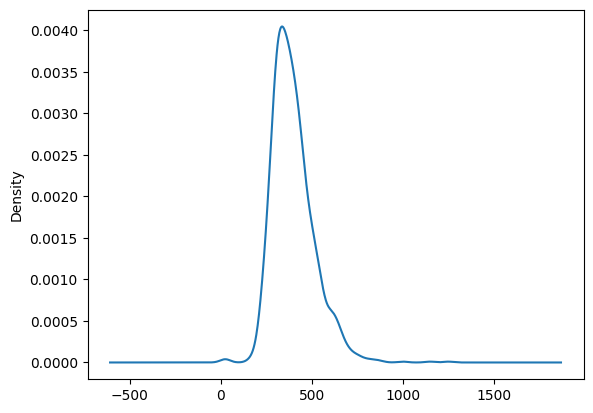

In [24]:
df['Area_per_bhk'].plot(kind='kde')

In [25]:
df

,price,Garden,Resale,Area,Parking,Furnished,Location,BHK,Area_per_bhk
0,1.00,yes,yes,500,0,1,Mumbai Central,1,500.0
1,1.20,yes,yes,464,1,1,Antop Hill,1,464.0
3,1.30,no,no,600,0,1,Vinay Nagar,2,300.0
4,2.50,yes,yes,975,1,1,Nahar Nagar,3,325.0
6,2.75,yes,yes,750,1,1,Amboli,2,375.0
...,...,...,...,...,...,...,...,...,...
1495,3.75,yes,yes,1000,1,1,Parel,2,500.0
1496,2.05,no,yes,555,0,1,Chandavarkar Road,2,277.5
1497,0.50,no,yes,279,0,1,MHB Colony Borivali West,1,279.0
1498,1.60,yes,yes,850,1,1,Goregaon East,2,425.0


In [26]:
df.describe()


,price,Area,Parking,Furnished,BHK,Area_per_bhk
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.119127,726.623119,0.286594,0.572503,1.874829,397.808231
std,2.400901,395.169922,0.452325,0.494885,0.848598,115.257727
min,0.120000,58.000000,0.000000,0.000000,1.000000,12.000000
25%,0.850000,464.000000,0.000000,0.000000,1.000000,320.000000
50%,1.500000,650.000000,0.000000,1.000000,2.000000,377.000000
75%,2.550000,865.000000,1.000000,1.000000,2.000000,455.000000
max,40.000000,5000.000000,1.000000,1.000000,5.000000,1250.000000


In [27]:
df[df['Area']<200]

,price,Garden,Resale,Area,Parking,Furnished,Location,BHK,Area_per_bhk
615,2.100,no,no,61,0,1,Santacruz West,2,30.5
1110,0.324,no,yes,58,0,0,Qureshi Nagar,2,29.0
1197,0.850,yes,yes,58,0,1,Mulund West,2,29.0
1416,40.000,yes,yes,60,1,0,Altamount Road,5,12.0


In [28]:
df=df[df['Area']>200]

In [29]:
df

,price,Garden,Resale,Area,Parking,Furnished,Location,BHK,Area_per_bhk
0,1.00,yes,yes,500,0,1,Mumbai Central,1,500.0
1,1.20,yes,yes,464,1,1,Antop Hill,1,464.0
3,1.30,no,no,600,0,1,Vinay Nagar,2,300.0
4,2.50,yes,yes,975,1,1,Nahar Nagar,3,325.0
6,2.75,yes,yes,750,1,1,Amboli,2,375.0
...,...,...,...,...,...,...,...,...,...
1495,3.75,yes,yes,1000,1,1,Parel,2,500.0
1496,2.05,no,yes,555,0,1,Chandavarkar Road,2,277.5
1497,0.50,no,yes,279,0,1,MHB Colony Borivali West,1,279.0
1498,1.60,yes,yes,850,1,1,Goregaon East,2,425.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1457 non-null   float64
 1   Garden        1457 non-null   object 
 2   Resale        1457 non-null   object 
 3   Area          1457 non-null   int32  
 4   Parking       1457 non-null   int64  
 5   Furnished     1457 non-null   int64  
 6   Location      1457 non-null   object 
 7   BHK           1457 non-null   int32  
 8   Area_per_bhk  1457 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(3)
memory usage: 102.4+ KB


<Axes: ylabel='Density'>

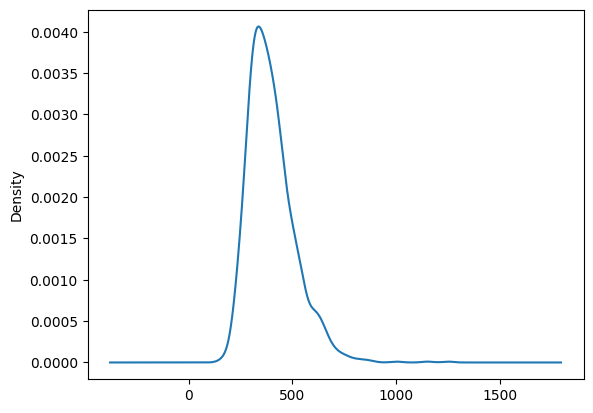

In [31]:
df['Area_per_bhk'].plot(kind='kde')

<Axes: ylabel='Density'>

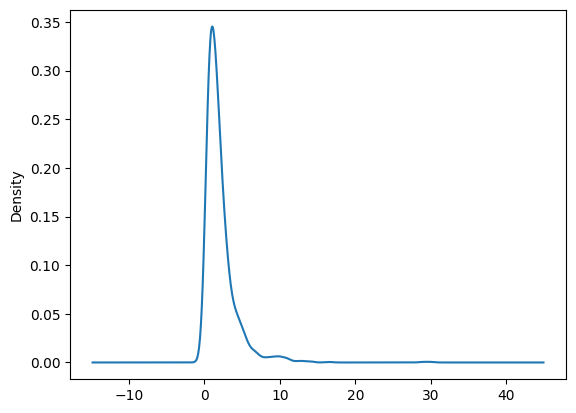

In [32]:
df['price'].plot(kind='kde')


<Axes: xlabel='BHK', ylabel='price'>

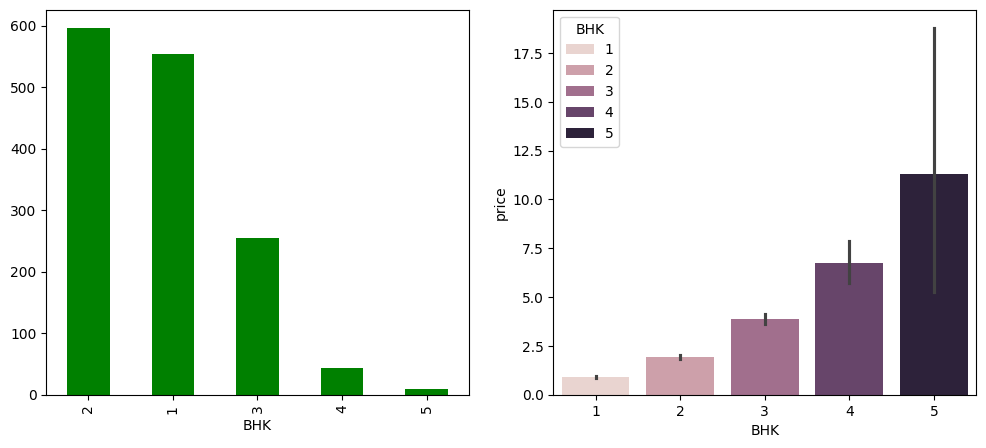

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['BHK'].value_counts().plot(kind='bar',color='green')
plt.subplot(1,2,2)
sns.barplot(x=df['BHK'],y=df['price'],hue=df['BHK'])

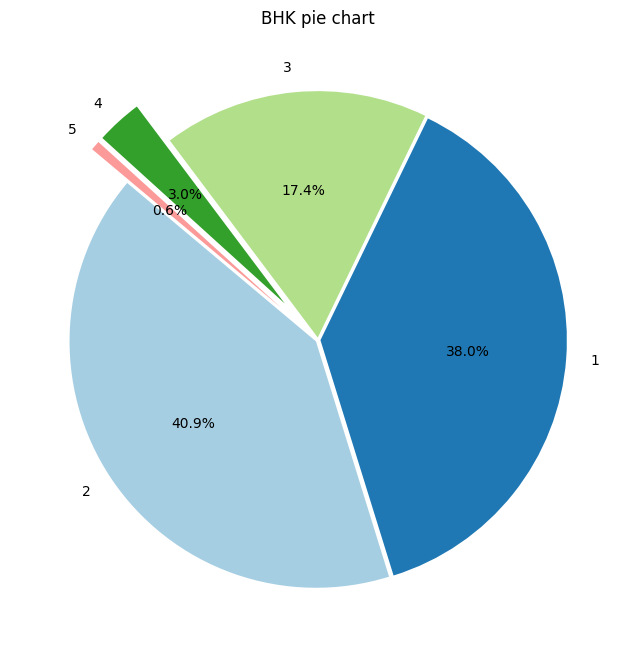

In [34]:
plt.figure(figsize=(8,8))

plt.pie(df['BHK'].value_counts().values,labels=df['BHK'].value_counts().index, autopct='%1.1f%%', startangle=140,explode=
        (0.01,0.01,0.01,0.2,0.2), colors=plt.cm.Paired.colors)
plt.title('BHK pie chart')
plt.show()

<Axes: xlabel='Parking', ylabel='price'>

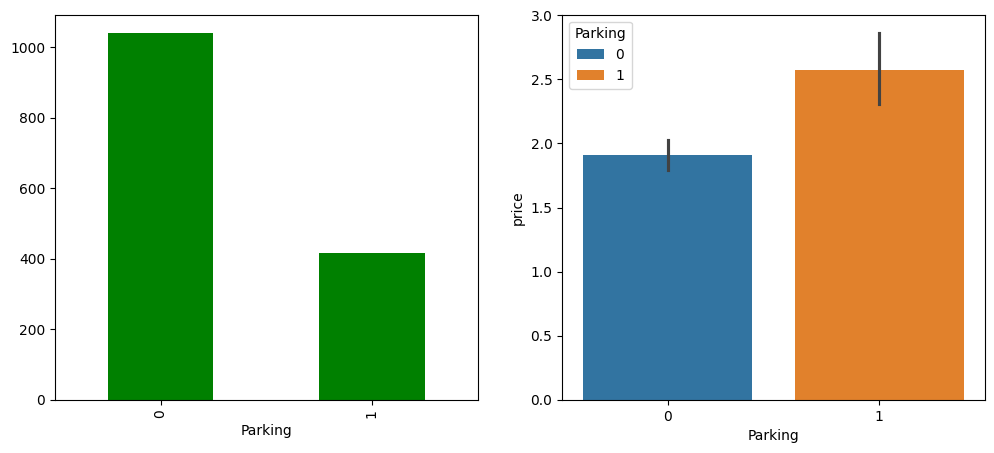

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['Parking'].value_counts().plot(kind='bar',color='green')
plt.subplot(1,2,2)
sns.barplot(x=df['Parking'],y=df['price'],hue=df['Parking'])

In [36]:
df['Location'] = df['Location'].apply(lambda x: x.strip())
location_count = df['Location'].value_counts()
print(location_count)

Location
Mumbai                        90
Andheri West                  56
Mulund West                   51
Mira Road Area                49
Andheri East                  45
                              ..
Bhalchandra Nagar              1
Sahar Road                     1
Gandhi Nagar Vikhroli West     1
Swami Vivekanand Road          1
MHB Colony Borivali West       1
Name: count, Length: 321, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\3363601870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].apply(lambda x: x.strip())


In [37]:
locations_count_less_5 = location_count[location_count<=5]
locations_count_less_5

Location
Golden Nest Phase 1             5
Sewri                           5
Byculla                         5
Tilak Nagar Chembur             5
Mahavir Nagar Kandivali West    5
                               ..
Bhalchandra Nagar               1
Sahar Road                      1
Gandhi Nagar Vikhroli West      1
Swami Vivekanand Road           1
MHB Colony Borivali West        1
Name: count, Length: 268, dtype: int64

In [38]:
df['Location'] = df['Location'].apply(lambda x:'other' if x in locations_count_less_5 else x)
df['Location'].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\4084845368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].apply(lambda x:'other' if x in locations_count_less_5 else x)


Location
other              432
Mumbai              90
Andheri West        56
Mulund West         51
Mira Road Area      49
Andheri East        45
Virar West          41
Chembur             40
Kandivali West      35
Bhandup West        33
Malad West          32
Powai               30
Kandivali East      29
Goregaon West       26
Borivali West       26
Malad East          21
Borivali East       20
Virar               20
Ghatkopar East      20
Naigaon East        19
Ghatkopar West      16
Bhayandar East      15
Mulund East         15
Santacruz East      15
Dadar West          15
Dahisar East        15
Vile Parle East     15
Parel               14
Kurla East          13
Vasai West          13
Kanjurmarg East     12
Vasai               11
Santacruz West      11
Bandra West         10
Mira Road East      10
Nalasopara West     10
Virar East           9
Goregaon East        9
Jogeshwari West      8
Worli                8
Jogeshwari East      8
Kurla West           8
Prabhadevi           8
Bh

In [39]:
def encode(x):
    if x=='yes':
        return 1

    else :
        return 0



In [40]:
df['Garden']=df['Garden'].apply(encode)
df['Resale']=df['Resale'].apply(encode)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\1135499941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garden']=df['Garden'].apply(encode)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8184\1135499941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resale']=df['Resale'].apply(encode)


In [41]:
df

,price,Garden,Resale,Area,Parking,Furnished,Location,BHK,Area_per_bhk
0,1.00,1,1,500,0,1,other,1,500.0
1,1.20,1,1,464,1,1,other,1,464.0
3,1.30,0,0,600,0,1,other,2,300.0
4,2.50,1,1,975,1,1,other,3,325.0
6,2.75,1,1,750,1,1,other,2,375.0
...,...,...,...,...,...,...,...,...,...
1495,3.75,1,1,1000,1,1,Parel,2,500.0
1496,2.05,0,1,555,0,1,other,2,277.5
1497,0.50,0,1,279,0,1,other,1,279.0
1498,1.60,1,1,850,1,1,Goregaon East,2,425.0


price           1.000000
Garden          0.071493
Resale          0.004611
Area            0.806480
Parking         0.137318
Furnished       0.079022
BHK             0.655616
Area_per_bhk    0.200997
Name: price, dtype: float64


<Axes: >

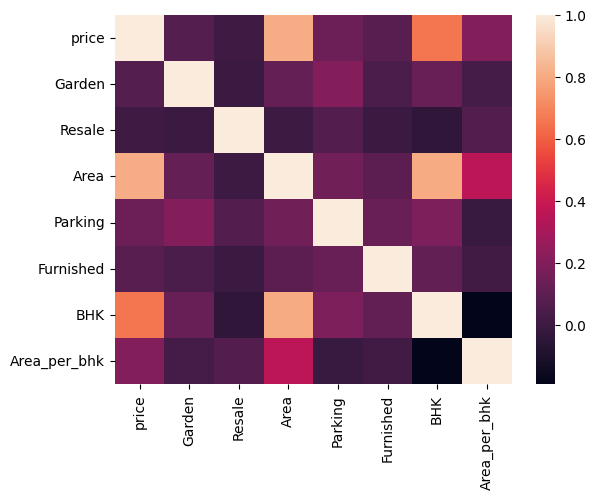

In [42]:
df_num=df.select_dtypes(exclude='object')
print(df_num.corr()['price'])
sns.heatmap(df_num.corr(),annot=False,fmt=".2f")

In [43]:
df=df.iloc[:,0:8]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV


In [45]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0],random_state=42,test_size=0.25)

# Decision Tree

In [47]:

trf1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[5])],remainder='passthrough')
trf2=DecisionTreeRegressor()

dt_pipe=Pipeline([('pipe1',trf1),
              ('pipe2',trf2)])
dt_pipe.fit(x_train,y_train)
y_pred=dt_pipe.predict(x_test)
dt_r2=r2_score(y_test,y_pred)
dt_MAE=mean_squared_error(y_test,y_pred)
dt_MSE=mean_squared_error(y_test,y_pred)
print("r2_score",dt_r2)
print("mean_squared_error",dt_MAE)
print("mean_squared_error",dt_MSE)
                                

r2_score 0.703304238616709
mean_squared_error 1.6983833780821918
mean_squared_error 1.6983833780821918


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
trf1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[5])],remainder='passthrough')

trf2=GradientBoostingRegressor(n_estimators=50)
GBR_pipe=Pipeline([('pipe1',trf1),
              ('pipe2',trf2)])
GBR_pipe.fit(x_train,y_train)
y_pred=GBR_pipe.predict(x_test)

GBR_r2=r2_score(y_test,y_pred)
GBR_MAE=mean_squared_error(y_test,y_pred)
GBR_MSE=mean_squared_error(y_test,y_pred)
print("r2_score",GBR_r2)
print("mean_squared_error",GBR_MAE)
print("mean_squared_error",GBR_MSE)
                                

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.741510636818659
mean_squared_error 1.479677484408324
mean_squared_error 1.479677484408324


In [85]:
trf1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[5])],remainder='passthrough')

trf2=RandomForestRegressor(n_estimators=25)
RFR_pipe=Pipeline([('pipe1',trf1),
              ('pipe2',trf2)])
RFR_pipe.fit(x_train,y_train)
y_pred=RFR_pipe.predict(x_test)
RFR_r2=r2_score(y_test,y_pred)
RFR_MAE=mean_squared_error(y_test,y_pred)
RFR_MSE=mean_squared_error(y_test,y_pred)
print("r2_score",RFR_r2)
print("mean_squared_error",RFR_MAE)
print("mean_squared_error",RFR_MSE)
                                

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.7082528151649977
mean_squared_error 1.6700561107306258
mean_squared_error 1.6700561107306258


In [51]:
trf1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[5])],remainder='passthrough')

trf2=BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=10)
BR_pipe=Pipeline([('pipe1',trf1),
              ('pipe2',trf2)])
BR_pipe.fit(x_train,y_train)
y_pred=BR_pipe.predict(x_test)

BR_r2=r2_score(y_test,y_pred)
BR_MAE=mean_squared_error(y_test,y_pred)
BR_MSE=mean_squared_error(y_test,y_pred)
print("r2_score",BR_r2)
print("mean_squared_error",BR_MAE)
print("mean_squared_error",BR_MSE)
                                

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.7306721445419456
mean_squared_error 1.5417205518266743
mean_squared_error 1.5417205518266743


In [65]:
trf1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[5])],remainder='passthrough')

trf2=Ridge()
ridge_pipe=Pipeline([('pipe1',trf1),
              ('pipe2',trf2)])
ridge_pipe.fit(x_train,y_train)
y_pred=ridge_pipe.predict(x_test)

ridge_r2=r2_score(y_test,y_pred)
ridge_MAE=mean_squared_error(y_test,y_pred)
ridge_MSE=mean_squared_error(y_test,y_pred)
print("r2_score",ridge_r2)
print("mean_squared_error",ridge_MAE)
print("mean_squared_error",ridge_MSE)
                                

r2_score 0.7613982487783084
mean_squared_error 1.3658343023401376
mean_squared_error 1.3658343023401376


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
trf1=ColumnTransformer(transformers=[('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[5])],remainder='passthrough')

trf2=SVR(kernel='rbf')
SVR_pipe=Pipeline([('pipe1',trf1),
              ('pipe2',trf2)])
SVR_pipe.fit(x_train,y_train)
y_pred=SVR_pipe.predict(x_test)

SVR_r2=r2_score(y_test,y_pred)
SVR_MAE=mean_squared_error(y_test,y_pred)
SVR_MSE=mean_squared_error(y_test,y_pred)
print("r2_score",SVR_r2)
print("mean_squared_error",SVR_MAE)
print("mean_squared_error",SVR_MSE)
                                

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


r2_score 0.4984791550860943
mean_squared_error 2.8708690100332643
mean_squared_error 2.8708690100332643


In [148]:
algo=['Decision tree','Random forest','Boosting','Bagging','Ridge','SVR']
R2=[dt_r2,RFR_r2,GBR_r2,BR_r2,ridge_r2,SVR_r2]
MAE=[dt_MAE,RFR_MAE,GBR_MAE,BR_MAE,ridge_MAE,SVR_MAE]
MSE=[dt_MSE,RFR_MSE,GBR_MSE,BR_MSE,ridge_MSE,SVR_MSE]
df=pd.DataFrame({'Algorithms':algo,
                
                'R2_score':R2,
                 'MAE':MAE,
                 'MSE':MSE
                })
df

,Algorithms,R2_score,MAE,MSE
0,Decision tree,0.705424,1.686251,1.686251
1,Random forest,0.708253,1.670056,1.670056
2,Boosting,0.741511,1.479677,1.479677
3,Bagging,0.739261,1.492557,1.492557
4,Ridge,0.761398,1.365834,1.365834
5,SVR,0.498479,2.870869,2.870869


In [ ]:
# with open('dataframe.pkl', 'wb') as f:
#     pickle.dump(df, f)

In [49]:
a=np.array([1,1,350,0,1,'Malad East',1]).reshape(1,-1)

a_df = pd.DataFrame(a, columns=x_train.columns)
dt_pipe.predict(a_df)

array([0.8])

In [213]:
a=np.array([1,1,850,1,1,'Goregaon East',2]).reshape(1,-1)

a_df = pd.DataFrame(a, columns=x_train.columns)
BR_pipe.predict(a_df)

array([1.6])

In [209]:
a=np.array([1,1,850,1,1,'Goregaon East',2]).reshape(1,-1)

a_df = pd.DataFrame(a, columns=x_train.columns)
dt_pipe.predict(a_df)

array([1.6])

In [191]:
a=np.array([0,1,50,1,0,'Vasai West',2]).reshape(1,-1)

a_df = pd.DataFrame(a, columns=x_train.columns)
GBR_pipe.predict(a_df)

array([1.19940416])

In [54]:
import pickle
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(BR_pipe, f)

In [157]:
x_train

,Garden,Resale,Area,Parking,Furnished,Location,BHK
822,1,1,810,1,1,Andheri East,3
1423,0,1,470,0,1,Bhandup West,1
1047,0,1,700,0,0,Kandivali East,2
497,1,1,609,0,0,Borivali West,2
1135,1,1,850,0,0,other,2
...,...,...,...,...,...,...,...
1127,1,1,1044,0,0,Andheri West,3
1162,0,1,250,0,1,Mumbai,1
1330,1,1,1485,0,1,Vile Parle East,3
884,1,1,570,0,0,other,2


In [53]:
a=np.array([1,1,350,0,1,'Malad East',1]).reshape(1,-1)

a_df = pd.DataFrame(a, columns=x_train.columns)
BR_pipe.predict(a_df)

array([0.85])